In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
weather=pd.read_csv("../data/weatherHistory.csv")
#weather.head()
print(weather.shape)
print(weather.columns.tolist())
#print(weather.describe())
#print(weather.isnull().sum())
#weather[weather.duplicated()]
weather=weather.dropna(subset=["Precip Type"])
print(weather.isnull().sum())

(96453, 12)
['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [18]:
#checking date format
weather["Formatted Date"]=pd.to_datetime(weather["Formatted Date"],errors="coerce",utc=True)


In [19]:
weather["Temperature (C)"]=weather["Temperature (C)"].round(2)
weather["Apparent Temperature (C)"]=weather["Apparent Temperature (C)"].round(2)
weather["Wind Speed (km/h)"]=weather["Wind Speed (km/h)"].round().astype(int)
weather["Wind Bearing (degrees)"]=weather["Wind Bearing (degrees)"].round(2).astype(int)
weather["Visibility (km)"]=weather["Visibility (km)"].round(2)

In [20]:
#basic EDA
weather.describe()
sns.set_theme(style='darkgrid',palette='pastel')


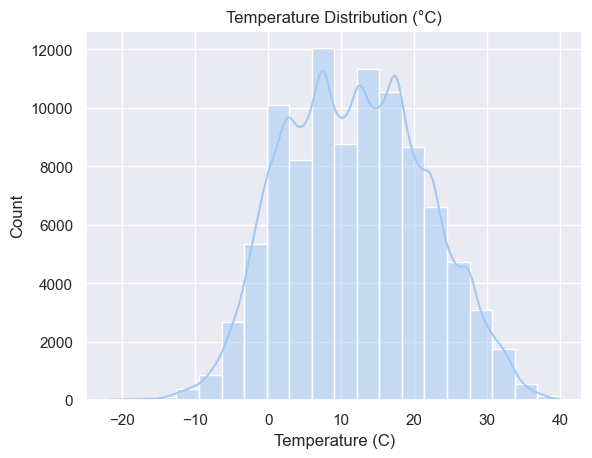

In [21]:
#Temperature Distribution (Histogram + KDE)
plt.Figure(figsize=(12,6))
sns.histplot(data=weather,x="Temperature (C)",kde=True,bins=20)
plt.title("Temperature Distribution (°C)")
plt.savefig("../outputs/Temperature Distribution (Histogram + KDE).png", dpi=300, bbox_inches="tight")
plt.show()


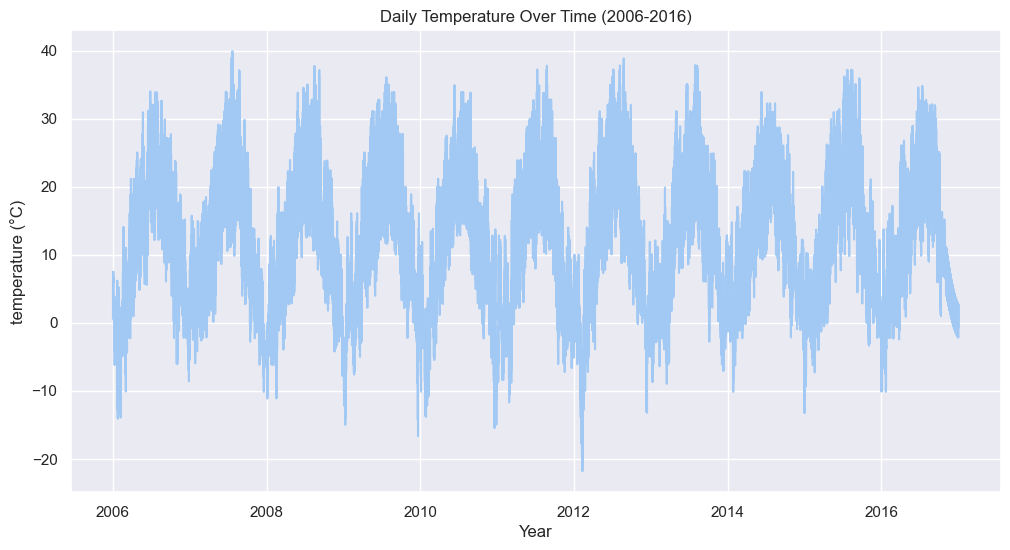

In [22]:
#Temperature Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=weather,x="Formatted Date",y="Temperature (C)",errorbar=None)
plt.title("Daily Temperature Over Time (2006-2016)")
plt.xlabel("Year")
plt.ylabel("temperature (°C)")
plt.grid(True)
plt.savefig("../outputs/Temperature Trends Over Time.png", dpi=300, bbox_inches="tight")
plt.show()

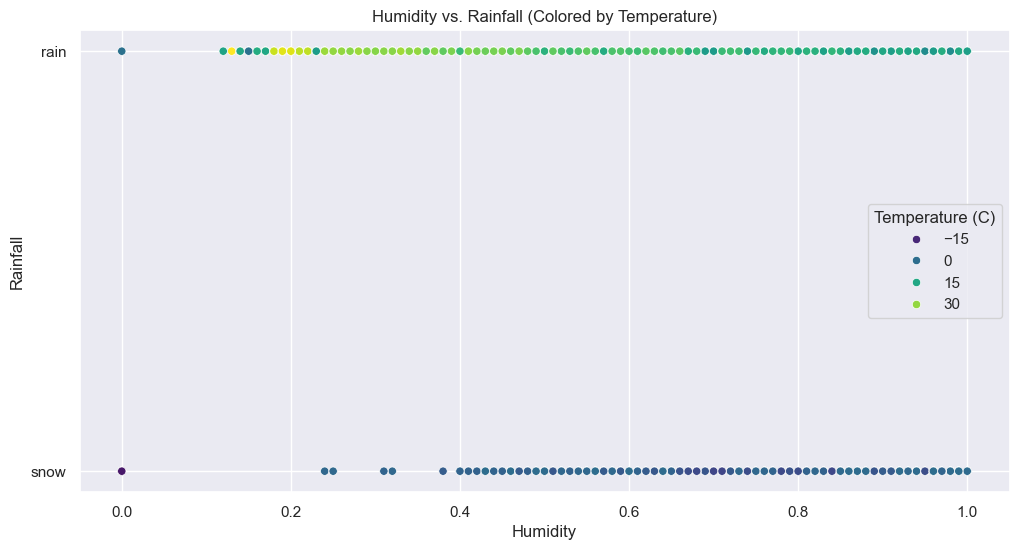

In [23]:
#Humidity vs. Rainfall
plt.figure(figsize=(12,6))
sns.scatterplot(data=weather,x="Humidity",y="Precip Type",palette="viridis",hue="Temperature (C)")
plt.title("Humidity vs. Rainfall (Colored by Temperature)")
plt.xlabel("Humidity")
plt.ylabel("Rainfall")
plt.grid(True)
plt.savefig("../outputs/Humidity vs. Rainfall.png", dpi=300, bbox_inches="tight")
plt.show()